# Free Vibrations of an Uniform Beam

A uniform beam, its length $L$, its stiffness $EJ=\text{const}$ and its
unit mass $\bar m=\text{const}$ is clamped at $x=0$ and is simply
supported at $x=L$.

![](trab01_conv.svg)   

The beam is in a condition of static equilibrium (see figure) under a
couple $W=w\frac{EJ}{L}$ applied at $x=L$ when, at time $t=0$, the
external load is suddenly released.

Determine the modal responses for the first 3 modes and plot the
bending moment $M_b(0, t)$ in the interval $0 \le \omega_0 t \le 5$,
where $\omega_0^2=\frac{EJ}{\bar mL^4}$

## Solution

We are going to

- recall the general form of the eigenfunctions of an uniform beam, solutions of the indefinite eq. of equilibrium,
- determine the eigenfunctions of the actual problem applying the boundary conditions,
    - determine the wavenumbers,
    - determine the frequencies of free vibration,
- determine the static equilibrium position of the beam (i.e., the initial conditions) using the moment-curvature relationship and 
    - determine the coefficients of the eigenfunctions expansion of said initial condition,
- determine the modal responses (free vibrations following given initial conditions),
- write the bending moment as a sum of second derivatives of the modal responses,
    - specialize for $t=0$ and discuss the problems arising from our particular boundary conditions,
    - specialize for $x=0$ and plot for $0\le\omega_0t\le10$ and discuss the role of the high frequency components with respect to the effects of damping.

### The eigenfunctions

The eigenfunctions of a uniform beam have the form
$$\phi_n = A_n\sin\beta_nx + B_n\cos\beta_nx + C_n\sinh\beta_nx + D_n\cosh\beta_nx,$$
where the _wave number_ $\beta$ is associated to the relevant frequency of vibration by the relationship
$$\beta_n^4=\frac{\bar{m}\omega_n^2}{EJ}
\qquad\mathrm{or,\ multiplying\ by\ L^4,}\qquad
(\beta_nL)^4=\omega_n^2\frac{\bar{m}L^4}{EJ} = \frac{\omega_n^2}{\omega_0^2}.$$

#### The boundary conditions, determination of wavenumbers and frequencies

The boundary conditions for our problem are
\begin{align*}
    \phi_n(0) &= 0 & \phi'_n(0)  &=0\\
    \phi_n(L) &= 0 & -EJ\phi''_n(L) &=0
\end{align*}
From the first two equations we find that $B_n+D_n=0$ and $A_n+C_n=0$, solving for $C_n$ and $D_n$ and substituting in the general integral we have

\begin{align*}
    \phi_n &= A_n(\sin\beta_nx-\sinh\beta_nx) + B_n(\cos\beta_nx-\cosh\beta_nx)\\
    \phi''_n &= -A_n\lambda^2_n(\sin\beta_nx+\sinh\beta_nx) - B_n\lambda_n^2(\cos\beta_nx+\cosh\beta_nx)
\end{align*}

The boundary conditions in $L$ can be written, after some
simplifications, in terms of a homogeneous linear system
$$
\begin{bmatrix}
  sin\beta_nL-\sinh\beta_nL&\cos\beta_nL-\cosh\beta_nL\\
  sin\beta_nL+\sinh\beta_nL&\cos\beta_nL+\cosh\beta_nL
\end{bmatrix}\,
\begin{Bmatrix}
  A_n\\B_N\end
{Bmatrix} =
\begin{Bmatrix}
  0\\0
\end{Bmatrix}
$$

Equating the determinant of the coefficent matrix to zero gives
$$
2 \cosh{\beta_n L} \sin{\beta_n L} - 2 \cos{\beta_n L} \sinh{\beta_n L}=0
\quad\leftrightarrow\quad
\sin{\beta_n L}=\cos{\beta_n L} \tanh{\beta_n L}.$$

Because for moderately large arguments it is $\tanh\beta L\simeq1$
we can write that the determinant is (almost) equal to zero when
$\sin\beta_n L=\cos\beta_n L$, i.e., when $\beta\,L = \pi/4 + n\pi$.

It is useful to plot
$\sin{\beta_n L}-\cos{\beta_n L} \tanh{\beta_n L}$ and
$\sin{\beta_n L}\cos{\beta_n L}$ against $\beta L/\pi$,


In [5]:
BetaL = linspace(0,5,501)
det_exact  = sin(pi*BetaL)-cos(pi*BetaL)*tanh(pi*BetaL)
det_approx = sin(pi*BetaL)-cos(pi*BetaL)

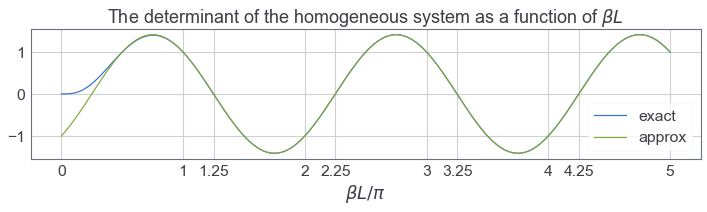

In [6]:
plt.plot(BetaL, det_exact,  label='exact')
plt.plot(BetaL, det_approx, label='approx')
plt.xticks([0]+[n+0.25 for n in (1,2,3,4)])
plt.title('The determinant of the homogeneous system as a function of $\\beta L$')
plt.xticks((0.00, 1.00, 1.25, 2.00, 2.25, 3.00, 3.25, 4.00, 4.25, 5.00),
           ('0', '1', '1.25', '2', '2.25', '3', '3.25', '4', '4.25', '5'))
plt.legend(); plt.xlabel(r'$\beta L/\pi$');

Not interested in the trivial solution $\beta_nL=0$, it's apparent that the roots are $\beta_nL\simeq(n+1/4)\pi$ but we can compute numerically more precise approximations to the roots of the determinant and eventually the frequencies of vibration, $\omega_n^2 = (\beta_nL)^4\omega_0^2$.

In [7]:
N = 3
roots = array([newton(lambda x: sin(x)-cos(x)*tanh(x), (r+1.25)*pi)
               for r in range(N)])
BetaL = roots
w1 = BetaL**2
w2 = w1**2

In [8]:
dL(r'\noindent The adimensional wavenumbers',
   groupalign(roots, 3, variable='\\beta_{%d}L'),
   r'$\text{The adimensional frequencies}$',
   groupalign(w1, 3, variable=r'\frac{\omega_{%d}}{\omega_0}'),
   r'$\text{The adimensional squared frequencies}$',
   groupalign(w2, 3, variable=r'\frac{\omega^2_{%d}}{\omega^2_0}'))

<IPython.core.display.Latex object>

#### The eigenfunctions

It is $\phi_n = (\sin\beta_nx - \sinh\beta_nx) A_n + (\cos\beta_nx - \cosh\beta_nx) B_n$, with (from the displacement boundary condition in $L$)

$$ (\sin\beta_nL - \sinh\beta_nL) A_n + (\cos\beta_nL - \cosh\beta_nL) B_n =
\mathcal{C}_{A_n} A_n + \mathcal{C}_{B_n} B_n =0
$$

In [9]:
CA, CB = sin(roots)-sinh(roots), cos(roots)-cosh(roots)
A = 1.0 ; B = -CA*A/CB

xi = linspace(0, 1, 1001)
b_xi = outer(xi, roots)
phi = A*(sin(b_xi)-sinh(b_xi)) + B*(cos(b_xi)-cosh(b_xi))

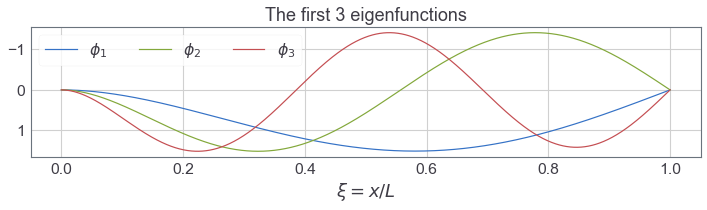

In [10]:
tlbl = '$\\tau=\\omega_0t$'
xlbl = '$\\xi=x/L$'

plt.legend(plt.plot(xi, phi), [r'$\phi_{%d}$'%n for n in range(1,7)], loc=0, ncol=3)
plt.xlabel(xlbl)
plt.title('The first %d eigenfunctions'%N )
rev_y()

### Static equilibrium position

![](trab05_conv.svg)

We put in evidence an hyperstatic reaction $Z=z\,EJ/L$, the bending moment is $M = (x-L) \, Z/L + x \, W/L$ ; the curvature is
$y'' = -EJ\,M = -(x-L)\,z/L^2 - x\,w/L^2$ ; integrating $y'= -(x-L)^2/2\,z/L^2 -x^2/2\,w/L^2 + A$ and 
$y = -(x-L)^3/6\,z/L^2 -x^3/6\,w/L^2 + Ax + B$.

Imposing the boundary conditions $y(0) = zL/6 + B = 0$ and $y'(0)=-z/2 + A=0$ we have $A=z/2$ and $B=-zL/6$

Substituting in $y$ it is $y=-(x-L)^3/6\,z/L^2 -x^3/6\,w/L^2 + x/2\,z - L/6\,z$. evaluating in $x=L$ and imposing a zero displacement we have
$y(L) = 0 =  (1/2 - 1/6) \, zL - 1/6\, wL \rightarrow z = w/2$.

Substituting again in $y$ and simplifying we have 
$$y(x) = \frac{wL}4 \frac{x^2L-x^3}{L^3} = L\,\frac{\xi^2-\xi^3}{4}\,w.$$

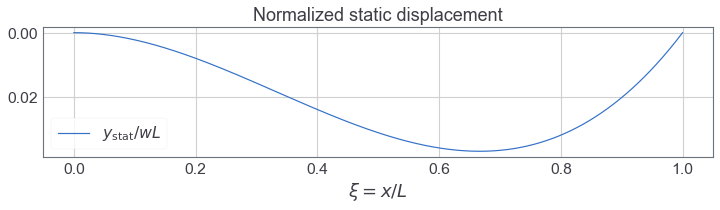

In [11]:
y = (1-xi)*xi*xi/4
plt.plot(xi, y, label='$y_\mathrm{stat}/wL$')
plt.title('Normalized static displacement')
plt.legend() ; plt.xlabel(xlbl)
rev_y()

#### Modal expansion of static displacement

We can represent the (known) static displacements in terms of a weighted sum of eigenfunctions 
$$y(x)=\sum_1^\infty \eta_n\phi_n(x),$$
whose coefficients can be easily determined by exploiting the orthogonality relation of the eigenfunctions:
$$\int_0^L \bar m(x)\,\phi_m y \,dx=\delta_{m,n}\,m_n\,\eta_n
\rightarrow \eta_n=\frac{\int_0^L \bar m(x)\,\phi_n y \,dx}{\int_0^L \bar m(x)\,\phi_n^2 \,dx}.$$

In [12]:
modal_mass =  array([trapz(phi_i**2, dx=0.001) for phi_i in phi.T])
modmass_eta = array([trapz(phi_i*y,  dx=0.001) for phi_i in phi.T])
eta = modmass_eta/modal_mass

In [13]:
dL(groupalign(eta, 3, variable='\\eta_{%d}', fmt='%+g'))

<IPython.core.display.Latex object>

Plotting the approximation to the static displacements obtained using a few eigenfunctions is not really useful, but it's so easy... We plot the approximant and the difference between the static displacements and the approximant.

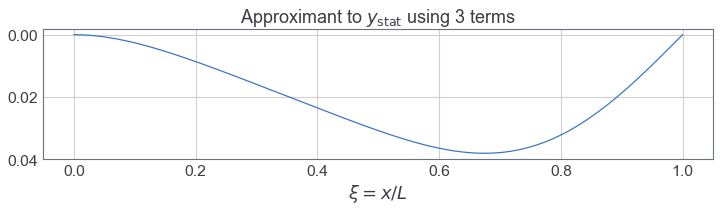

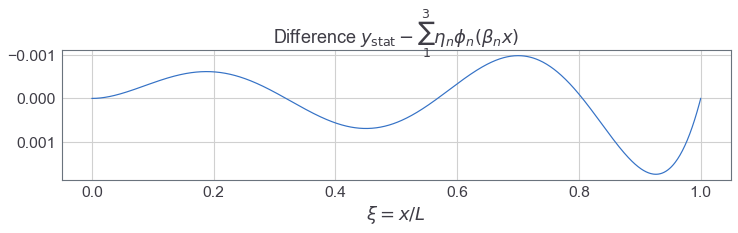

In [14]:
y3 = phi@eta
plt.plot(xi, y3); plt.xlabel(xlbl)
plt.title(r'Approximant to $y_\mathrm{stat}$ using %d terms'%N)
rev_y()
plt.show()
plt.plot(xi, y-y3) ; plt.xlabel(xlbl)
plt.title(r'Difference $y_\mathrm{stat} - \sum_1^{%d} \eta_n\phi_n(\beta_n x)$'%N)
rev_y()

### The Modal Responses

We know that the initial velocity is zero, the modal displacements are equal to $\eta_i$ and so the modal responses are simply
$$\frac{q_n(t)}{wL} = \eta_n \cos\omega_nt = \eta_n \cos(\beta_n^2L^2\omega_0t)$$

In [15]:
responses = [r'\frac{q_{%d}}{wL} &= %+g \cos(%g\omega_0t)'%(n, eta_n, w_n)
               for n, eta_n, w_n in zip(count(1), eta, w1)]
align_res = r',\\\\'.join(',&'.join(res for res in row if res) for row in grouper(responses, 2))
dL(r'\begin{align}', align_res, r'.\end{align}')

<IPython.core.display.Latex object>

### The Bending Moment $M(0, t)$

It is $M = -EJ y''$, or

$$  M = -EJ\,wL \sum \eta_n\frac{1}{L^2}\frac{d^2\phi_n(\beta_nL\,\xi)}{d\xi^2}\cos\omega_it = 
     -\left(\sum\eta_n\frac{d^2\phi_n(\beta_nL\,\xi)}{d\xi^2}\cos\omega_it\right) W.
$$

Because
$$
  \left.-\frac{d^2\phi_n(\beta_nL\,\xi)}{d\xi^2}\right|_{\xi=0} = 
  \left.\beta_n^2L^2\left(\strut
    (\sin\beta_n\xi + \sinh\beta_n\xi) A_n +
    (\cos\beta_n\xi + \cosh\beta_n\xi)B_n\right)
  \right|_{\xi=0} = 2\frac{\omega_n}{\omega_0}B_n$$

we can finally write $M(0, t) = 2 W \sum \frac{\omega_n}{\omega_0}\,\eta_n\,B_n \cos(\frac{\omega_n}{\omega_0}\,\omega_0t)$

In [16]:
dL(r'$$\frac{M(0)}{W} =', ' '.join(
    r'%+.6g\cos(%.2f\omega_0t)'%(coef, w) for coef, w in zip(w1*eta*B*2, w1)), r'+\ldots$$')

<IPython.core.display.Latex object>

#### Static bending moment

Before proceding with $M(0,t)$ it is interesting to compute the approximation to $M(x, 0)$, that is _how well_ we are approximating the bending moment at the beginning of our analysis.
\begin{multline}
  M(x, 0) = -EJ \, wL \sum \eta_n\,\frac{d^2\phi_n}{d\,x^2} \cos(\omega_n 0) = \\
  = W \sum \frac{\omega_n}{\omega_0}\eta_n\left(\strut
    (\sin\beta_n\xi + \sinh\beta_n\xi) A_n +(\cos\beta_n\xi + \cosh\beta_n\xi)B_n
  \right)
\end{multline}

In [17]:
# d2y is the NEGATIVE of the second spatial derivative of \phi
d2y = A*(sin(b_xi)+sinh(b_xi)) + B*(cos(b_xi)+cosh(b_xi))
M_stat = d2y@(eta*BetaL**2)

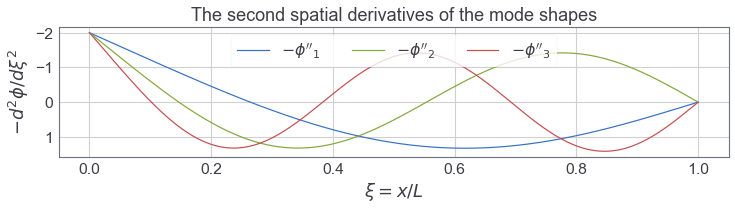

-0.6180668193431146

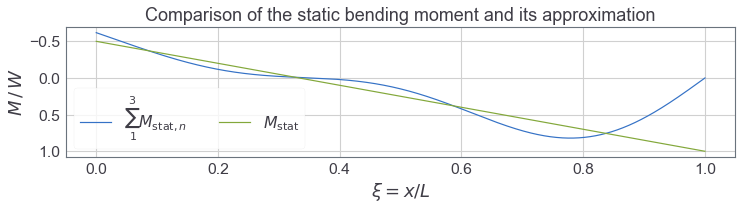

In [18]:
# plot the derivatives
plt.legend(plt.plot(xi, d2y), (r"$-\phi''_{%d}$"%(n) for n, _ in enumerate(d2y, 1)), ncol=3)
plt.xlabel(xlbl)
plt.ylabel(r'$-d^2\phi/d\xi^2$')
plt.title('The second spatial derivatives of the mode shapes')
rev_y()
plt.show()

# plot the static M(x)/W (from -0.5 to +1) and the approximation using N modes
plt.plot(xi, M_stat, label=r'$\sum_1^{%d}M_{\mathrm{stat, }n}$'%N)
plt.plot(xi, 0.5*(xi-1)+xi, label=r'$M_\mathrm{stat}$')
plt.xlabel(xlbl)
plt.ylabel(r'$M\, /\, W$')
plt.title('Comparison of the static bending moment and its approximation')
plt.legend(ncol=3)
rev_y()
M_stat[0]

As you can see, we are in trouble inasmuch the bending moment in $x=L$ _can not_ be approximated correctly, 
as we are summing contributions of the type $\phi''(L) \equiv 0$. Ask your favourite search engine about "Gibbs phenomenon".

#### The response in terms of bending at the fixed support
We need an 1D array with the instants of (dimensionless) time, a 2D array with the arguments of the cosines (i.e., time multiplied by the frequencies), a 2D array with the cosines of said arguments and finally we multiply the cosines by the coefficients

In [19]:
t = linspace(0, 5, 5001)
wt = outer(t, BetaL**2)
cwt = cos(wt)
M = cwt@(2*B*eta*BetaL**2)

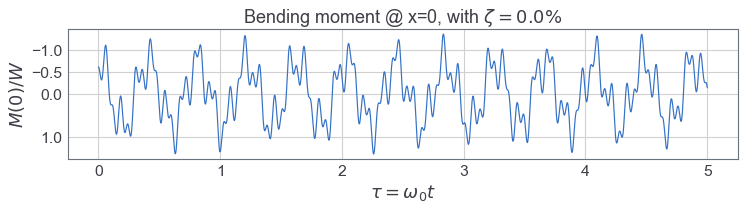

In [20]:
if 1:
    plt.plot(t, M)
    plt.title('Bending moment @ x=0, with $\\zeta=0.0\\%$')
    plt.xlabel(r'$\tau=\omega_0t$')
    plt.ylabel(r'$M(0)/W$')
    plt.ylim((-1.5, 1.5))
    plt.yticks((-1, -0.5, 0, 1))
    rev_y()


Let's see what happens if we take into account a very small value of viscous damping.

Similar to what we have done for MDoF systems, we assume that the modal shapes are not affected by the presence of damping and that the modal response is $$q_i(t) = \exp(-\zeta\omega_it) (A_i\sin\omega_{D,i}t + B_i\cos\omega_{D,i}t).$$
In our case, $q_i(0) = q_{o,i}$ and $\dot{q}_i(0)=0$, it is $B_i = q_{o,i}$ and $A_i = \zeta B_i/\sqrt{1-\zeta^2}$; for small $\zeta$, we can approximately write $\omega_{D,i}\simeq\omega_i$ and $A_i\simeq\zeta B_i$.

Let's say $\zeta=0.5\%$ and compute and plot the (approximated) response

In [21]:
zeta = 0.005
swt = sin(wt)
Md = (exp(-zeta*wt)*(zeta*swt+cwt))@(2*B*eta*BetaL**2)

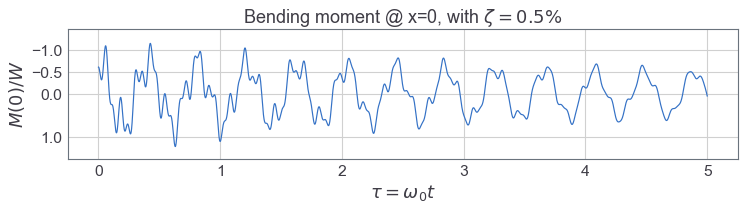

In [22]:
if 1:
    plt.plot(t, Md)
    plt.title('Bending moment @ x=0, with $\\zeta=0.5\\%$')
    plt.xlabel(r'$\tau=\omega_0t$')
    plt.ylabel(r'$M(0)/W$')
    plt.ylim((-1.5, 1.5))
    plt.yticks((-1, -0.5, 0, 1))
    rev_y()

As you can see, the effects of viscous damping are really important for the high frequency modal components, that is because the decrement
$$
  \exp(-\zeta\omega_nt) = \exp(-\zeta\frac{2\pi}{T_n}t) = 
  e^{-2\pi\zeta}e^\frac{t}{T_n} = e^{-2\pi\zeta}e^{n_\text{cycles}}.
$$
is proportional to the _exponential_ of the number of cycles involved...

Here we stop with this printed solution, but if you like you can download [the notebook](nbiewer.jupyter.com/...) that is the source of this paper and as an added bonus you'll receive an interactive plotting widget that lets you investigate the variation of the response with respect to the value of the damping ratio.  A further bonus (well, possibly so...) is the code that produced the plots and the mathematical displays, code that's been _hidden_ in this paper to streamline the narrative but could be interesting from a different point of view.

In [29]:
def p(z=0.5):
    zeta = z/100.0
    M = (exp(-zeta*wt)*(zeta*swt+cwt))@(2*B*eta*BetaL**2)
    plt.plot(t, M)
    plt.title('Bending moment @ x=0, with $\\zeta=%.1f\\%%$'%z)
    plt.xlabel(r'$\tau=\omega_0t$')
    plt.ylabel(r'$M(0)/W$')
    plt.ylim((-1.5, 1.5))
    plt.yticks((-1, -0.5, 0, 1))
    rev_y()
interact(p, z=(0, 2.0)) ; 

interactive(children=(FloatSlider(value=0.5, description='z', max=2.0), Output()), _dom_classes=('widget-inter…

## The Initialization Cells

I have placed the inizialization cells here, rather than at the beginning of the notebook, to not disturb the flow of the narrative. We have all the necessary imports, plus the definition of some helper functions, mostly connected to the formatting  of the results...

### The import  statements

In [3]:
%matplotlib inline
import numpy as np
from numpy import array, cos, cosh, exp, linspace, outer
from numpy import pi, sin, sinh, sqrt, tanh, trapz
import matplotlib.pyplot as plt
from scipy.optimize import newton
from jupyterthemes import jtplot
from itertools import count, zip_longest
from ipywidgets import interact

### Configuration statements and function definitions

In [4]:
jtplot.style(context='paper', fscale=1.5, figsize=(15, 3))
def rev_y(): plt.ylim(plt.ylim()[::-1])

def dL(*l):
    from IPython.display import Latex
    display(Latex(' '.join(l)))

def grouper( iterable, N):
    return zip_longest(*([iter(iterable)]*N))

def groupalign(seq, N, variable='x_{%d}', fmt='%g', closing='.'):
    beg = r'\begin{align*}'
    end = closing + r'\end{align*}'
    xfmt = variable + '&=' + fmt
    g = grouper(seq, N)
    body = r',\\'.join(
        ',&'.join(
            xfmt%(1+i+N*j, x) for i, x in enumerate(items) if x != None)
        for j, items in enumerate(g))
    return ''.join((beg, body, end))